In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [26]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

import gc
import sys

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder



import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
teamwise_home_away=pd.read_csv('teamwise_home_and_away.csv')
teamwise_home_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [28]:
Matches=pd.read_csv('matches.csv')
Matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [29]:
SR=pd.read_csv('most_runs_average_strikerate.csv')
SR

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
511,ND Doshi,0,1,13,0.000000,0.000000
512,J Denly,0,1,1,0.000000,0.000000
513,S Ladda,0,2,9,0.000000,0.000000
514,V Pratap Singh,0,1,1,0.000000,0.000000


In [7]:
Deliveries=pd.read_csv('/kaggle/input/ipl-data-set/deliveries.csv')
Deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [30]:
Teams=pd.read_csv('teams.csv')
Teams

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


# Team Name Categorisation

In [31]:
teamwise_home_away['team'].replace('Pune Warriors',0,inplace=True)
teamwise_home_away['team'].replace('Kolkata Knight Riders',1,inplace=True)
teamwise_home_away['team'].replace('Rajasthan Royals',2,inplace=True)
teamwise_home_away['team'].replace('Kochi Tuskers Kerala',3,inplace=True)
teamwise_home_away['team'].replace('Gujarat Lions',4,inplace=True)
teamwise_home_away['team'].replace('Chennai Super Kings',5,inplace=True)
teamwise_home_away['team'].replace('Rising Pune Supergiants',6,inplace=True)
teamwise_home_away['team'].replace('Delhi Daredevils',7,inplace=True)
teamwise_home_away['team'].replace('Deccan Chargers',8,inplace=True)
teamwise_home_away['team'].replace('Delhi Capitals',9,inplace=True)
teamwise_home_away['team'].replace('Mumbai Indians',10,inplace=True)
teamwise_home_away['team'].replace('Sunrisers Hyderabad',11,inplace=True)
teamwise_home_away['team'].replace('Rising Pune Supergiant',12,inplace=True)
teamwise_home_away['team'].replace('Royal Challengers Bangalore',13,inplace=True)
teamwise_home_away['team'].replace('Kings XI Punjab',14,inplace=True)
teamwise_home_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,12,5,5,8,8,62.500000,62.500000
1,10,58,51,101,86,57.425743,59.302326
2,5,51,49,89,75,57.303371,65.333333
3,9,3,7,6,10,50.000000,70.000000
4,11,30,28,63,45,47.619048,62.222222
5,2,29,46,67,80,43.283582,57.500000
6,8,18,11,43,32,41.860465,34.375000
7,14,38,44,91,85,41.758242,51.764706
8,13,35,49,85,95,41.176471,51.578947
9,1,34,58,83,95,40.963855,61.052632


In [10]:
Matches['team1'].replace('Pune Warriors',0,inplace=True)
Matches['team1'].replace('Kolkata Knight Riders',1,inplace=True)
Matches['team1'].replace('Rajasthan Royals',2,inplace=True)
Matches['team1'].replace('Kochi Tuskers Kerala',3,inplace=True)
Matches['team1'].replace('Gujarat Lions',4,inplace=True)
Matches['team1'].replace('Chennai Super Kings',5,inplace=True)
Matches['team1'].replace('Rising Pune Supergiants',6,inplace=True)
Matches['team1'].replace('Delhi Daredevils',7,inplace=True)
Matches['team1'].replace('Deccan Chargers',8,inplace=True)
Matches['team1'].replace('Delhi Capitals',9,inplace=True)
Matches['team1'].replace('Mumbai Indians',10,inplace=True)
Matches['team1'].replace('Sunrisers Hyderabad',11,inplace=True)
Matches['team1'].replace('Rising Pune Supergiant',12,inplace=True)
Matches['team1'].replace('Royal Challengers Bangalore',13,inplace=True)
Matches['team1'].replace('Kings XI Punjab',14,inplace=True)

Matches['team2'].replace('Pune Warriors',0,inplace=True)
Matches['team2'].replace('Kolkata Knight Riders',1,inplace=True)
Matches['team2'].replace('Rajasthan Royals',2,inplace=True)
Matches['team2'].replace('Kochi Tuskers Kerala',3,inplace=True)
Matches['team2'].replace('Gujarat Lions',4,inplace=True)
Matches['team2'].replace('Chennai Super Kings',5,inplace=True)
Matches['team2'].replace('Rising Pune Supergiants',6,inplace=True)
Matches['team2'].replace('Delhi Daredevils',7,inplace=True)
Matches['team2'].replace('Deccan Chargers',8,inplace=True)
Matches['team2'].replace('Delhi Capitals',9,inplace=True)
Matches['team2'].replace('Mumbai Indians',10,inplace=True)
Matches['team2'].replace('Sunrisers Hyderabad',11,inplace=True)
Matches['team2'].replace('Rising Pune Supergiant',12,inplace=True)
Matches['team2'].replace('Royal Challengers Bangalore',13,inplace=True)
Matches['team2'].replace('Kings XI Punjab',14,inplace=True)

Matches['toss_winner'].replace('Pune Warriors',0,inplace=True)
Matches['toss_winner'].replace('Kolkata Knight Riders',1,inplace=True)
Matches['toss_winner'].replace('Rajasthan Royals',2,inplace=True)
Matches['toss_winner'].replace('Kochi Tuskers Kerala',3,inplace=True)
Matches['toss_winner'].replace('Gujarat Lions',4,inplace=True)
Matches['toss_winner'].replace('Chennai Super Kings',5,inplace=True)
Matches['toss_winner'].replace('Rising Pune Supergiants',6,inplace=True)
Matches['toss_winner'].replace('Delhi Daredevils',7,inplace=True)
Matches['toss_winner'].replace('Deccan Chargers',8,inplace=True)
Matches['toss_winner'].replace('Delhi Capitals',9,inplace=True)
Matches['toss_winner'].replace('Mumbai Indians',10,inplace=True)
Matches['toss_winner'].replace('Sunrisers Hyderabad',11,inplace=True)
Matches['toss_winner'].replace('Rising Pune Supergiant',12,inplace=True)
Matches['toss_winner'].replace('Royal Challengers Bangalore',13,inplace=True)
Matches['toss_winner'].replace('Kings XI Punjab',14,inplace=True)

Matches['winner'].replace('Pune Warriors',0,inplace=True)
Matches['winner'].replace('Kolkata Knight Riders',1,inplace=True)
Matches['winner'].replace('Rajasthan Royals',2,inplace=True)
Matches['winner'].replace('Kochi Tuskers Kerala',3,inplace=True)
Matches['winner'].replace('Gujarat Lions',4,inplace=True)
Matches['winner'].replace('Chennai Super Kings',5,inplace=True)
Matches['winner'].replace('Rising Pune Supergiants',6,inplace=True)
Matches['winner'].replace('Delhi Daredevils',7,inplace=True)
Matches['winner'].replace('Deccan Chargers',8,inplace=True)
Matches['winner'].replace('Delhi Capitals',9,inplace=True)
Matches['winner'].replace('Mumbai Indians',10,inplace=True)
Matches['winner'].replace('Sunrisers Hyderabad',11,inplace=True)
Matches['winner'].replace('Rising Pune Supergiant',12,inplace=True)
Matches['winner'].replace('Royal Challengers Bangalore',13,inplace=True)
Matches['winner'].replace('Kings XI Punjab',14,inplace=True)

Matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,11,13,13,field,normal,0,11.0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,10,12,12,field,normal,0,12.0,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,4,1,1,field,normal,0,1.0,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,12,14,14,field,normal,0,14.0,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,13,7,13,bat,normal,0,13.0,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,1,10,10,field,normal,0,10.0,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,5,10,5,bat,normal,0,10.0,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,11,9,9,field,normal,0,9.0,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,9,5,5,field,normal,0,5.0,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [33]:
# checking if there's any data leakages


#Matches
mm=len(Matches==np.NaN)
#team_home_away_performance
ha=len(teamwise_home_away==np.NaN)

print(mm,ha)

756 14


some pre-processing before replacing data leakages

In [34]:
def non_num_data(df):
    columns=df.columns.values
    
    for column in columns:
        text_digit_vals={}
        def con_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype!=np.int64 and df[column].dtype!=np.float64:
            column_contents=df[column].values.tolist()
            unique_elements=set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1
            df[column]=list(map(con_to_int,df[column]))
    return df

In [35]:
print(non_num_data(teamwise_home_away))
print(non_num_data(Matches))


    team  home_wins  away_wins  home_matches  away_matches  \
0     12          5          5             8             8   
1     10         58         51           101            86   
2      5         51         49            89            75   
3      9          3          7             6            10   
4     11         30         28            63            45   
5      2         29         46            67            80   
6      8         18         11            43            32   
7     14         38         44            91            85   
8     13         35         49            85            95   
9      1         34         58            83            95   
10     7         25         42            72            89   
11     0          6          6            20            26   
12     3          2          4             7             7   
13     4          1         12            14            16   

    home_win_percentage  away_win_percentage  
0             62.50000

In [36]:
teamwise_home_away.replace(np.NaN,-99999,inplace=True)
Matches.replace(np.NaN,-99999,inplace=True)


In [37]:
print(teamwise_home_away)
print(Matches)


    team  home_wins  away_wins  home_matches  away_matches  \
0     12          5          5             8             8   
1     10         58         51           101            86   
2      5         51         49            89            75   
3      9          3          7             6            10   
4     11         30         28            63            45   
5      2         29         46            67            80   
6      8         18         11            43            32   
7     14         38         44            91            85   
8     13         35         49            85            95   
9      1         34         58            83            95   
10     7         25         42            72            89   
11     0          6          6            20            26   
12     3          2          4             7             7   
13     4          1         12            14            16   

    home_win_percentage  away_win_percentage  
0             62.50000

<BarContainer object of 14 artists>

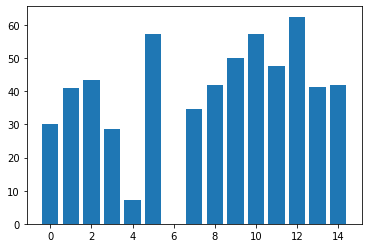

In [38]:
y1=teamwise_home_away['home_win_percentage']
x1=teamwise_home_away['team']
plt.bar(x1,y1)

<BarContainer object of 14 artists>

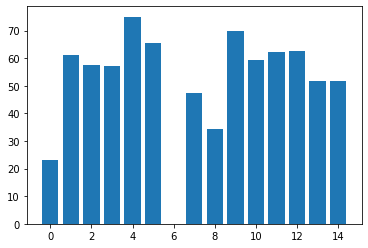

In [39]:
y2=teamwise_home_away['away_win_percentage']
x2=teamwise_home_away['team']
plt.bar(x2,y2)

<BarContainer object of 14 artists>

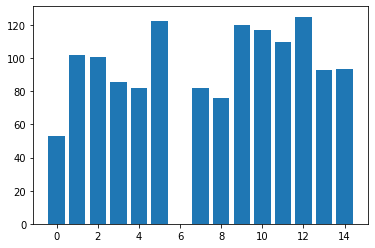

In [40]:
y_tot=y1+y2
x_tot=x2
plt.bar(x_tot,y_tot)

toss won at home ground


In [41]:
hmtswn=len(Matches[Matches['team1']==Matches['toss_winner']])
print('won toss at home ground',hmtswn/len(Matches))

won toss at home ground 0.38756613756613756


toss won at away ground

In [42]:
awtswn=len(Matches[Matches['team2']==Matches['toss_winner']])
print('won toss at away ground', awtswn/len(Matches))

won toss at away ground 0.6124338624338624


toss decision at home

In [43]:
home_matches=Matches[Matches['team1']==Matches['toss_winner']]
hm_bat=len(home_matches[home_matches['toss_decision']==1])
print('percentage of choosing bat after winning the toss at home ground: ',hm_bat/len(home_matches))
print('percentage of choosing field after winning the toss at home ground: ',1-(hm_bat/len(home_matches)))

percentage of choosing bat after winning the toss at home ground:  0.0
percentage of choosing field after winning the toss at home ground:  1.0


toss decision at away

In [44]:
home_matches=Matches[Matches['team2']==Matches['toss_winner']]
hm_bat=len(home_matches[home_matches['toss_decision']==1])
print('percentage of choosing bat after winning the toss at home ground: ',hm_bat/len(home_matches))
print('percentage of choosing field after winning the toss at home ground: ',1-(hm_bat/len(home_matches)))

percentage of choosing bat after winning the toss at home ground:  1.0
percentage of choosing field after winning the toss at home ground:  0.0


Conclusion : 
Data isn't well manufactured.
It's giving huge differences over EDA

team won by runs

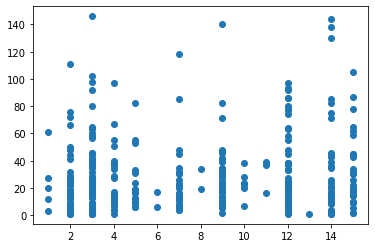

In [45]:
win_df=Matches[Matches['win_by_runs']!=0]
team_won1=win_df['winner']
by_runs=win_df['win_by_runs']
plt.scatter(team_won1,by_runs)

In [48]:
team=Teams['team1']
print('Average win run trail')
for i in range(1,15):
    val=win_df[win_df['winner']==i]
    tot_run=sum(val['win_by_runs'])
    print(team[i],'---',tot_run/len(val))
    

Average win run trail
Kolkata Knight Riders --- 24.6
Rajasthan Royals --- 24.342105263157894
Kochi Tuskers Kerala --- 32.73684210526316
Gujarat Lions --- 27.0
Chennai Super Kings --- 23.38888888888889
Rising Pune Supergiants --- 11.5
Delhi Daredevils --- 23.766666666666666
Deccan Chargers --- 26.5
Delhi Capitals --- 30.166666666666668
Mumbai Indians --- 23.166666666666668
Sunrisers Hyderabad --- 30.666666666666668
Rising Pune Supergiant --- 34.19230769230769
Royal Challengers Bangalore --- 1.0
Kings XI Punjab --- 35.77142857142857


team won by wickets


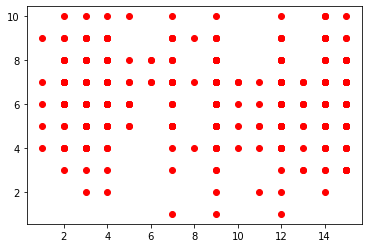

In [49]:
wick_df=Matches[Matches['win_by_wickets']!=0]
team_won2=wick_df['winner']
wick=wick_df['win_by_wickets']
plt.scatter(team_won2,wick,color='r')


In [50]:
print('Average win wicket trail')
for i in range(1,15):
    val1=wick_df[wick_df['winner']==i]
    tot_run1=sum(val1['win_by_wickets'])
    print(team[i],'---',tot_run1//len(val1))

Average win wicket trail
Kolkata Knight Riders --- 6
Rajasthan Royals --- 6
Kochi Tuskers Kerala --- 6
Gujarat Lions --- 6
Chennai Super Kings --- 6
Rising Pune Supergiants --- 7
Delhi Daredevils --- 6
Deccan Chargers --- 6
Delhi Capitals --- 6
Mumbai Indians --- 6
Sunrisers Hyderabad --- 4
Rising Pune Supergiant --- 6
Royal Challengers Bangalore --- 5
Kings XI Punjab --- 6


([<matplotlib.patches.Wedge at 0x7f946a30ba10>,
 [Text(-0.25208530194380285, 1.0707254552610121, 'Pune Warriors'),
  Text(-0.7274214013942623, 0.8251412635383155, 'Kolkata Knight Riders'),
  Text(-1.0980655239102493, 0.06520816819777885, 'Rajasthan Royals'),
  Text(-1.0429955904726222, -0.34951423183422176, 'Kochi Tuskers Kerala'),
  Text(-1.0074665824460889, -0.4416005947169885, 'Gujarat Lions'),
  Text(-0.6425867611910884, -0.8927946316717789, 'Chennai Super Kings'),
  Text(0.18076925003876448, -1.08504491991826, 'Delhi Daredevils'),
  Text(0.6378915260411488, -0.8961553442372001, 'Deccan Chargers'),
  Text(0.7912737562269319, -0.764124232508381, 'Delhi Capitals'),
  Text(1.0767954319083635, -0.22474785387469473, 'Mumbai Indians'),
  Text(0.918189594840797, 0.6057457122638948, 'Sunrisers Hyderabad'),
  Text(0.6799542543197061, 0.8646746278413241, 'Rising Pune Supergiant'),
  Text(0.24252079322485975, 1.072932274122456, 'Royal Challengers Bangalore')])

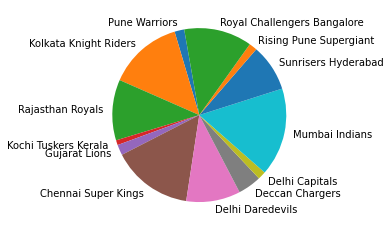

In [29]:
wins=[]
team_1=[]
tot_wins=sum(teamwise_home_away['home_wins']+teamwise_home_away['away_wins'])
for i in range(14):
    val2=teamwise_home_away[teamwise_home_away['team']==i]
    if i!=6:
        wins.append(int(val2['home_wins']+val2['away_wins']))
        team_1.append(team[i])
plt.pie(wins,labels=team_1,startangle=100)

Batsman and Runs

<BarContainer object of 50 artists>

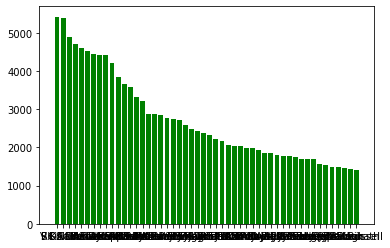

In [51]:
btmn=SR['batsman'].head(50)
tot_runs1=SR['total_runs'].head(50)
plt.bar(btmn,tot_runs1,label=np.array(50),color='g')

strike rate over runs

(50,) (50,)


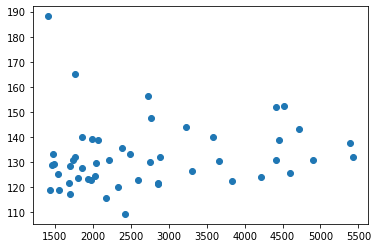

In [52]:
strike_rate=SR['strikerate'].head(50)
# plt.bar(strike_rate,tot_runs1)
print(strike_rate.shape,tot_runs1.shape)
plt.scatter(tot_runs1,strike_rate)